# Day 08. Exercise 04
# Regression

## 0. Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [3]:
df = pd.read_csv("../../data/checker_regression.csv")

In [4]:
df.fillna(0, inplace=True)

In [5]:
X = df.drop(axis = 1, labels=['AVG(diff)', 'uid'])
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [7]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits)
    err_list = []
    for train_ind, test_ind in kf.split(X):
        model.fit(X.iloc[train_ind], y.iloc[train_ind])
        err_train = root_mean_squared_error(y.iloc[train_ind], model.predict(X.iloc[train_ind]))
        err_test = root_mean_squared_error(y.iloc[test_ind], model.predict(X.iloc[test_ind]))
        err_list.append(err_test)
        print("train -", err_train, "|", "test -", err_test)
    print("Average RMSE on crossval is", np.mean(err_list))

In [8]:
m1 = LinearRegression(fit_intercept=False)
m2 =  DecisionTreeRegressor(max_depth=1, random_state=21)
m3 =  RandomForestRegressor(n_estimators=10, max_depth=1, random_state=21)

crossval(3, X_train, y_train, m1)
crossval(3, X_train, y_train, m2)
crossval(3, X_train, y_train, m3)

train - 39.311685239647296 | test - 59.20896179226765
train - 49.0925440777224 | test - 42.64434788052653
train - 51.16106648761358 | test - 37.00733021698582
Average RMSE on crossval is 46.28687996326
train - 23.865370785786162 | test - 42.08414262835693
train - 34.77476345630167 | test - 22.367409637436538
train - 33.55888657101393 | test - 26.310752459783433
Average RMSE on crossval is 30.254101575192298
train - 23.982427873056828 | test - 44.36629607504113
train - 35.60226123187255 | test - 24.036414579955252
train - 33.6722536417303 | test - 25.09099580249067
Average RMSE on crossval is 31.16456881916235


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [20]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train);

In [19]:
m1_pred = pd.Series(m1.predict(X_test))
m2_pred = pd.Series(m2.predict(X_test))
m3_pred = pd.Series(m3.predict(X_test))

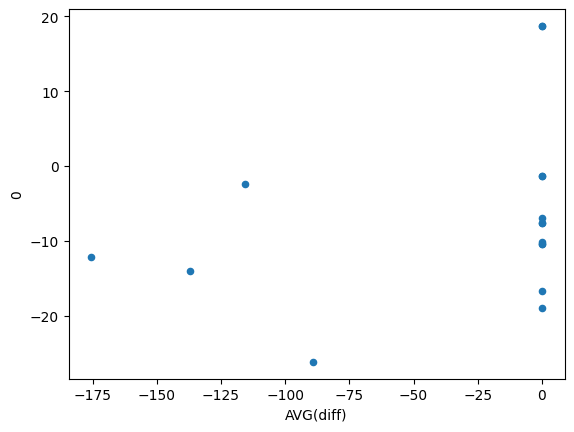

In [14]:
pd.concat([y_test.reset_index(), m1_pred], axis=1).plot(x = "AVG(diff)", y = 0, kind='scatter');

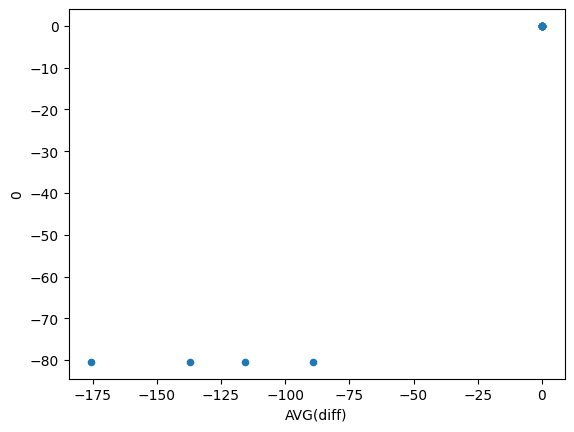

In [12]:
pd.concat([y_test.reset_index(), m2_pred], axis=1).plot(x = "AVG(diff)", y = 0, kind='scatter');

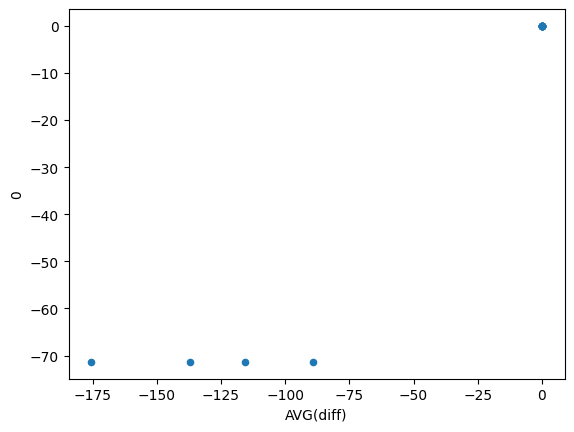

In [21]:
pd.concat([y_test.reset_index(), m3_pred], axis=1).plot(x = "AVG(diff)", y = 0, kind='scatter');